# Skriftlig innlevering 7, Oppgave 1 (av 3)

I denne oppgaven skal du benytte stokastisk simulering til å utforske hvordan et residualplott ser ut når modellen som antas i enkel lineær regresjon er korrekt og hvordan residualplott ser ut i noen tilfeller hvor den antatte modellen ikke er korrekt.

Vi skal starte med å anta følgende modell. For $i=1,2,\ldots,n$ la

$y_i = 0.5 + 0.25 x_i + \varepsilon_i$,

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og normalfordelte med forventningsverdi lik null og varians lik $0.25^2$. Her er altså modellen som antas i enkel lineær regresjon korrekt, og parameterverdiene er $\alpha=0.5$, $\beta=0.25$ og $\sigma=0.25$.

Python-koden under simulerer først verdier for $x_1,x_2,\ldots,x_n$ for $n=25$ ved å trekke verdier fra en normalfordeling med forventningsverdi lik null og standardavvik lik $2$. Deretter genereres verdier for $y_1,y_2,\ldots,y_n$ ifølge modellen formulert over. De genererte verdiene visuliseres så i et spredningsplott.

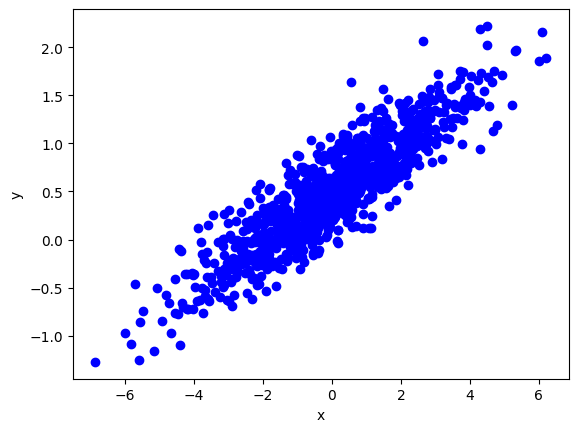

In [139]:
# Du trenger ikke endre noe i denne koden!

import numpy as np
#from scipy.stats import norm
import matplotlib.pyplot as plt

#Initialisering av parameterverdier
n = 1000
alpha = 0.5
beta = 0.25
sigma = 0.25

#Simulering av data etter modell
x = np.random.normal(loc=0,scale=2,size=n) # trekker x_1,x_2,...,x_n
y = alpha + beta * x + np.random.normal(loc=0,scale=sigma,size=n) # genererer tilhørende verdier for y_i

#Visualiserer resultatet i et plott
plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Under er det gitt en python-funksjon som tar vektorer $x$ og $y$ som input og regner ut estimatene $\hat{\alpha}$, $\hat{\beta}$ og $S^2$ i en enkel lineær regresjonsmodell. Dette er tilsvarende metode som ble gjort i skriftlig innlevering 6, bare nå med et konstantledd (SME for lineærregresjon).

In [140]:
# Du trenger ikke endre noe i denne koden!

def estimerELR(x,y):
    #Beregner gjennomsnitt
    xStrek = np.mean(x)
    yStrek = np.mean(y)
    #Estimater for parametere
    betaHat = np.sum((x-xStrek)*y)/np.sum((x-xStrek)**2)
    alphaHat = yStrek - betaHat * xStrek
    S2 = np.sum((y-(alphaHat+betaHat*x))**2)/(len(x)-2)
    #Returnerer resultatet i en liste
    return [alphaHat,betaHat,S2]

paramHat = estimerELR(x,y)
print('alphaHat: ',paramHat[0])
print('betaHat: ',paramHat[1])
print('s2: ',paramHat[2])     

alphaHat:  0.5046636770256301
betaHat:  0.24919205983791007
s2:  0.06307758915878857


### Deloppgave a)

Kjør de to bitene med python-kode gitt over. Betrakt nå de genererte $x$ og $y$-verdiene som observerte verdier, og skriv under python-kode som regner ut de resulterende (estimerte) residualene. Lag også et residualplott hvor du plotter $x_i$-verdiene langs $x$-aksen og de (estimerte) residualene langs $y$-aksen. 

Kjør gjerne (alle de tre) pythonkodebitene flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte regresjonsmodellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.

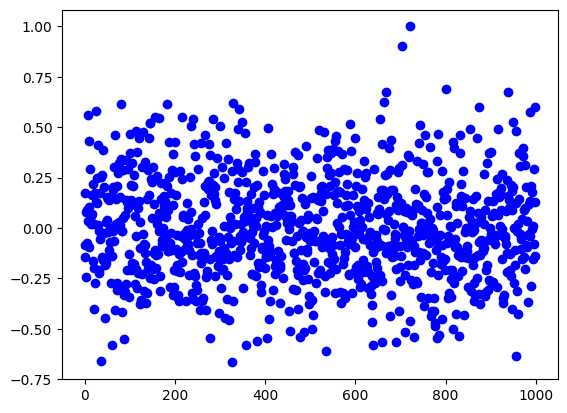

In [141]:
# Her kan du skrive din python-kode
residuals = [0]*n
alphaHat = paramHat[0]
betaHat = paramHat[1]

for i in range(n):
    residuals[i] = y[i] - (alphaHat + betaHat * x[i])

xvalues = [i for i in range(n)]

plt.plot(xvalues,residuals,"bo")
plt.show()


#### Her er deloppgave a) slutt.

Du skal så utforske hvordan et residualplott kan bli seende ut når modellen som antas i enkel lineær regresjon ikke er korrekt. For å gjøre dette skal du først generere $x$-verdier ved å trekke verdier fra samme fordeling som gjort over. Deretter skal du generere $y$-verdier ifølge

$y_i = 0.5 + 0.25 x_i + 0.02 x_i^2 + \varepsilon_i,$

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og normalfordelte med forventningsverdi null og varians lik $0.10^2$.

### Deloppgave b)


Skriv python-kode som genererer $n=25$ par $(x_i,y_i)$ som beskrevet over. Betrakt så disse simulerte dataene som observerte data og tilpass en enkel lineær regresjonsmodell ved å kalle python-funksjonen estimerELR gitt over. Regn så ut (estimerte) residualer og generer residualplott. 

Kjør gjerne python-koden flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte modellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.

-1565.9776270022862
-1.1501910535116622e-13


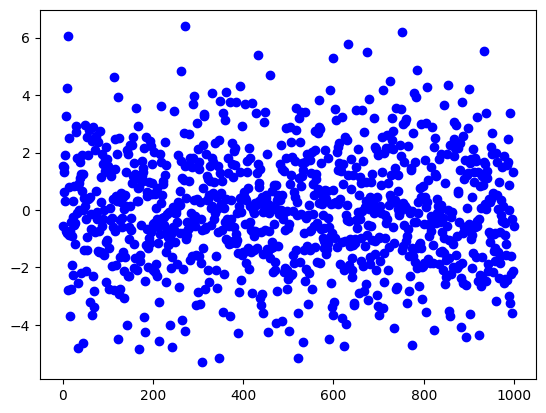

In [144]:
# Her kan du skrive din python-kode
n = 1000

x = [0]*n
y = [0]*n

residuals = [0]*n
def findLargestResidual(m):
    largest = 0
    for j in range(m):
        for i in range(n):
            x[i] = np.random.normal(loc = 0, scale = 2)

        for i in range(n):
            y[i] = 0.5 + 0.25*x[i] + 0.02*(x[i]**2) + np.random.normal(loc=0, scale=0.10)

        xBar = sum(x)/n
        yBar = sum(y)/n

        betaHat = np.sum((x[i]-xBar)*y[i]) / np.sum((x[i]-xBar)**2)
        alphaHat = yBar - betaHat*xBar

        for i in range(n):
            res = y[i] - (alphaHat + betaHat*x[i])
            if np.abs(res) > np.abs(largest):
                largest = res
            residuals[i] = res
    print(largest)

findLargestResidual(100)
xValues = [i for i in range(n)]
print(sum(residuals))
plt.plot(xValues,residuals,"bo")
plt.show()





#### Her er deloppgave b) slutt.

Du skal så utforske hvordan residualplottet blir seende ut for en annen modell som avviker fra hva som antas i en enkel lineær regresjonsmodell. Genererer igjen $x_i$-verdier på samme måte som over. Genererer deretter $y_i$-verdier ifølge

$y_i = 0.5 + 0.25 x_i + \varepsilon_i,$

der $\varepsilon_1,\varepsilon_2,\ldots,\varepsilon_n$ er uavhengige og $\varepsilon_i\sim N(0,0.10^2\cdot(0.1+x_i^2))$


### Deloppgave c)

Skriv og kjørpython-kode som simulerer $x$- og $y$-verdier som beskrevet over, og så bruker disse tilsvarende som i oppgave b) over til å generere tilhørende residualplott. 

Kjør gjerne python-koden flere ganger slik at du får et inntrykk av hvordan residualplottet varierer for ulike datasett (generert fra den spesifiserte modellen). Diskuter kort hva du ser (eller ikke kan se) i residualplottene.

-52.98685079289735


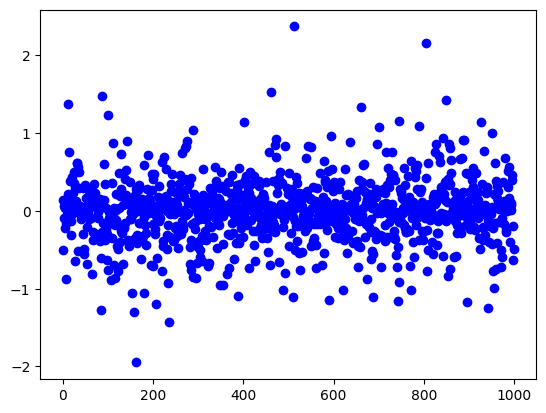

In [143]:
# Her kan du skrive din python-kode
n = 1000

x = [0]*n
y = [0]*n
residuals = [0]*n
def findLargestResidual(m):
    largest = 0
    for j in range(m):
        for i in range(n):
            x[i] = np.random.normal(loc = 0, scale = 2)

        for i in range(n):
            y[i] = 0.5 + 0.25*x[i] + np.random.normal(loc=0, scale=np.sqrt(0.10**2 * (0.1 + x[i]**2)))

        xBar = sum(x)/n
        yBar = sum(y)/n

        betaHat = np.sum((x[i]-xBar)*y[i]) / np.sum((x[i]-xBar)**2)
        alphaHat = yBar - betaHat*xBar

        for i in range(n):
            residuals[i] = y[i] - (alphaHat + betaHat*x[i])
            if np.abs(y[i] - (alphaHat + betaHat*x[i])) > np.abs(largest):
                largest = y[i] - (alphaHat + betaHat*x[i]) 
    print(largest)

findLargestResidual(100)
xValues = [i for i in range(n)]

plt.plot(xValues,residuals,"bo")
plt.show()



